## Kymograph-like plot to visualise a trajectory of base pair formations

### Load bp data

To visualise the base pair formation of a sequence along a trajectory, the data should be prepared as a 2-dimensional array such as,

```
bptraj = numpy.array([
    [0, 0, 1, 1, 0, 0, 1, 0, ....................., 1],
    [0, 1, 1, 1, 0, 0, 1, 1, ....................., 0],
    [0, 0, 1, 0, 0, 0, 1, 1, ....................., 1],
       .........................................
       .........................................
    [0, x(t,1), x(t,2), ..., x(t,i), ...., x(t, N_nt)],
       .........................................
       .........................................
    [0, x(T,1), x(T,2), ................., x(T, N_nt)]
    ])
```

where `x(t,i)` is whether the nucleotide `i` forms a base pair (1) or not (0) at time frame `t`.

The total number of time frames is `T` and the length the RNA (number of nucleotides) is `N_nt`.

Note that the first element of the array at each time is all `0`, so the length of the array is `N_nt+1`.

This data can be generated from a `bp` file as follows.

In [56]:
## Sample code to load base pair trajectory from a bp file.

from lop.file_io.sisbp import SisbpFile

bpfile = SisbpFile('../initial_fold/noSS/run001/md.bp')
bpfile.open_to_read()

N_nt = 217
bptraj = []

while bpfile.has_more_data():
    pairs, _ = bpfile.read_onestep()
    bps = [0]*(N_nt+1) # Index 0 will not be used.
    for p in pairs:
        bps[p[0]] = 1
        bps[p[1]] = 1
    bptraj.append(bps)

bptraj = np.array(bptraj)

## Make a kymograph-like plot

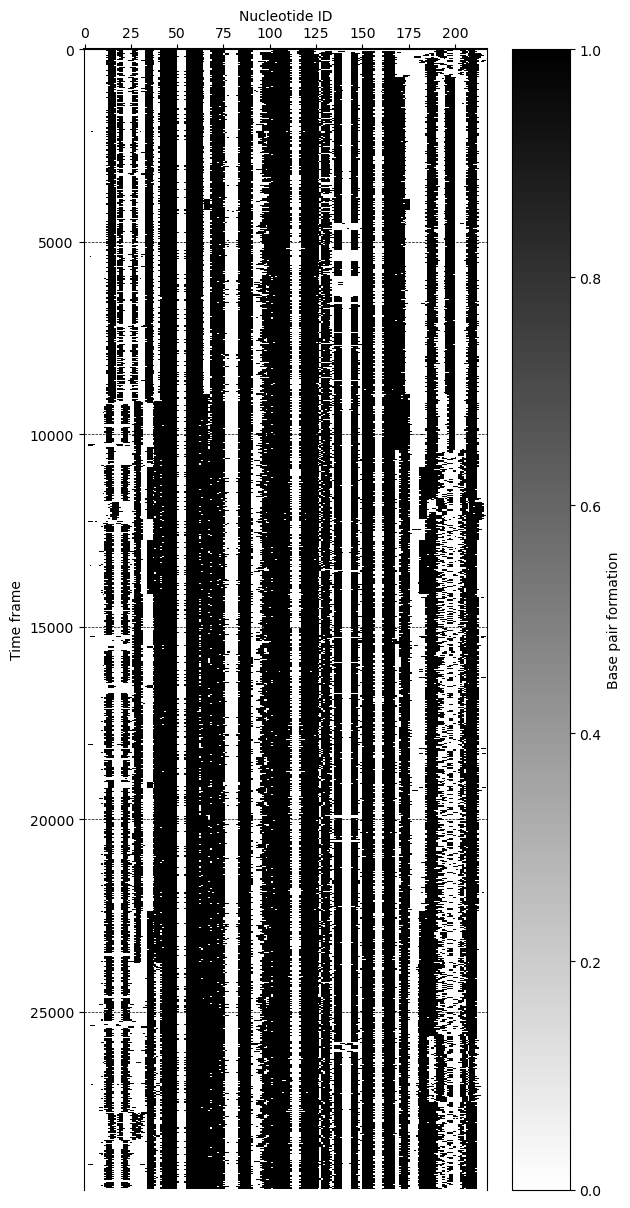

In [57]:
import matplotlib.pyplot as plt
import numpy as np

time_length = bptraj.shape[0]

# Create the plot with dashed grid lines and x-axis on top
plt.figure(figsize=(N_nt*0.03, time_length*0.0005))   # This control the size

plt.imshow(bptraj, cmap="binary", aspect="auto", interpolation="nearest")
plt.colorbar(label="Base pair formation")
plt.xlabel("Nucleotide ID")
plt.ylabel("Time frame")
#plt.title("Base pair formation kymograph")
plt.gca().xaxis.tick_top()  # Move x-axis ticks to the top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to the top

# Add dashed grid lines on y-axis
plt.grid(axis='y', color='black', linestyle='--', linewidth=0.5)

# Draw x-axis as a solid line at the top
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['top'].set_linewidth(1.5)
# Hide the bottom spine
plt.gca().spines['bottom'].set_visible(False)

plt.show()

## Plot with downsampling

Typically, the length of the trajectory is long (i.e. many time frames) and sometimes the length of the RNA is also long (e.g. mRNA).

Therefore, within a reasonable plot size, each pixel contains more than one data point. In this case, it may be more appropriate to take the average value for each pixel.

The code below performs the downsampling before plotting.

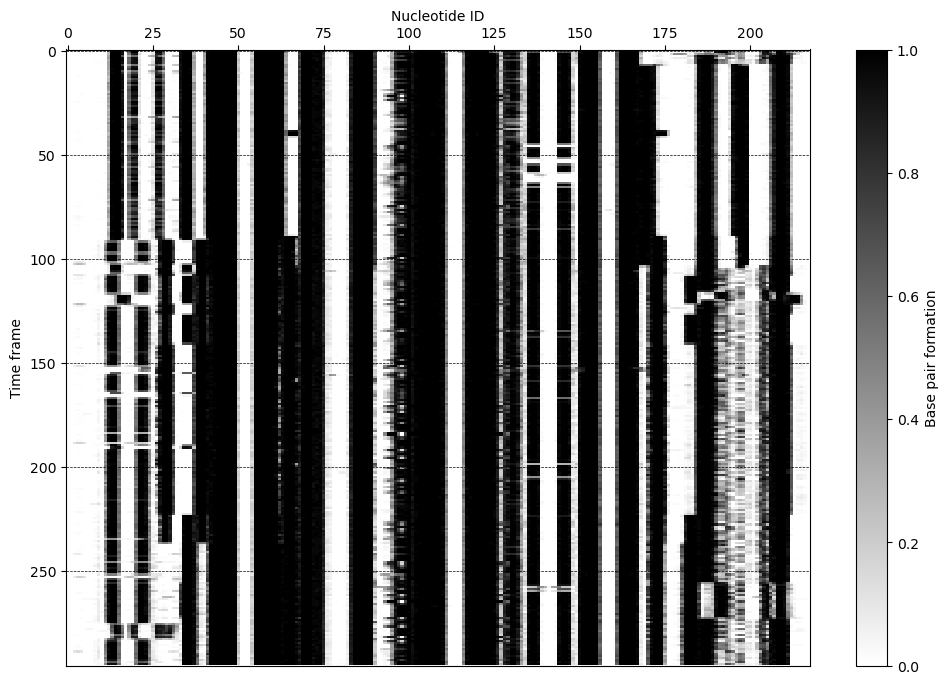

In [58]:
# Function to downsample the data for visualization
def downsample_data(data, time_factor=1, array_factor=1):
    """
    Downsample the input 2D array by averaging over blocks.
    :param data: 2D numpy array, original data
    :param time_factor: Downsample factor for the time dimension
    :param array_factor: Downsample factor for the array dimension
    :return: Downsampled 2D numpy array
    """
    time_steps, array_length = data.shape
    downsampled = data[: time_steps // time_factor * time_factor, : array_length // array_factor * array_factor]
    downsampled = downsampled.reshape(
        time_steps // time_factor, time_factor, array_length // array_factor, array_factor
    ).mean(axis=(1, 3))
    return downsampled

# Downsample the data
time_factor = 100    # Combine 100 time steps into one pixel
array_factor = 1     # Combine 1 nucleotides into one pixel (no averaging for this direction)

downsampled_data = downsample_data(bptraj, time_factor=time_factor, array_factor=array_factor)

# Create the plot for the downsampled data
plt.figure(figsize=(12, 8))
#plt.imshow(downsampled_data, cmap="viridis", aspect="auto", interpolation="nearest")   # colorful version
#plt.colorbar(label="Average Value")
plt.imshow(downsampled_data, cmap="binary", aspect="auto", interpolation="nearest")
plt.colorbar(label="Base pair formation")
plt.xlabel("Nucleotide ID")
plt.ylabel("Time frame")
#plt.title("Downsampled Kymograph-like Visualization")
plt.gca().xaxis.tick_top()  # Move x-axis ticks to the top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to the top

# # Adjust x-axis ticks to display sparse labels
# num_downsampled_columns = downsampled_data.shape[1]
# step = max(1, num_downsampled_columns // 10)  # Adjust labels based on downsampled size
# plt.xticks(ticks=np.arange(0, num_downsampled_columns, step), 
#            labels=np.arange(1, num_downsampled_columns * array_factor + 1, step * array_factor))

plt.grid(axis='y', color='black', linestyle='--', linewidth=0.5)

plt.show()